In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import zipfile
import seaborn as sns
import joblib
import pickle
import os

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import warnings
warnings.filterwarnings('ignore')

# Preprocessing libraries
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix

# Statistical libraries
from scipy import stats
from scipy.stats import zscore, skew



    # Assuming 'df' is your DataFrame
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)

# Display Settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="muted")

In [2]:
# 1. Load Data
GTD_zip = r"C:\Users\ncc5444\Downloads\archive (1).zip"


In [3]:
df=GTD_zip
df=pd.read_csv(df, encoding='ISO-8859-1', low_memory=False)
df.head(5   )


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [5]:
# Basic inspection
print("Shape of dataset:", df.shape)
print("\nPreview:")
display(df.head(5))

# Info & Missing values
df.info()
print("\nMissing Values Summary:")
print(df.isnull().sum().sort_values(ascending=False))

Shape of dataset: (181691, 135)

Preview:


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB

Missing Values Summary:
gsubname3             181671
weapsubtype4          181621
weapsubtype4_txt      181621
weaptype4_txt         181618
weaptype4             181618
claimmode3            181558
claimmode3_txt        181558
gsubname2             181531
claim3                181373
guncertain3           181371
divert                181367
gname3                181367
attacktype3           181263
attacktype3_txt       181263
ransomnote            181179
ransompaidus          181139
ransomamtus           181128
claimmode2_txt        181075
claimmode2            181075
ransompaid            180917
corp3                 180665
targsubtype3_txt      180594
targsubtype3          180594
natlty3_txt           180544
natlty3               180544
target3               180516
targtype3             180515
targty

In [6]:
df.info()
df.describe()
df.isnull().sum()
df.shape
df.columns
df.dtypes
df.nunique()
df.tail()
df.sample(10)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


(181691, 135)

In [7]:
print(df.columns)
print(df.info())
print(df.describe())
print(df.isnull().sum())

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB
None
            eventid          iyear         imonth           iday  \
count  1.816910e+05  181691.000000  181691.000000  181691.000000   
mean   2.002705e+11    2002.638997       6.467277      15.505644   
std    1.325957e+09      13.259430       3.388303       8.814045   
min    1.970000e+11    1970.000000       0.000000       0.000000   
25%    1.991021e+11    1991.000000       4.000000       8.000000   
50%    2.009022e+11    2009.000000       6.000000      15.000000   
75%    2.014081e+11    2014.000000

In [8]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

Data Cleaning & Wrangling

(1) Handle Missing Values and Duplicates

In [9]:
# Drop duplicate records if any
df.drop_duplicates(inplace=True)

# Replace invalid or missing city names
df['city'] = df['city'].replace('Unknown', np.nan)
df['city'].fillna('Not Specified', inplace=True)

# Fill missing numerical fields
num_cols = ['nkill', 'nkillus', 'nperps', 'latitude', 'longitude']
for col in num_cols:
    df[col] = df[col].fillna(0)

# Drop irrelevant columns for analysis (optional)
drop_cols = ['eventid', 'provstate', 'target1', 'gsubname', 'weapsubtype1_txt', 'targsubtype1_txt']
df.drop(columns=drop_cols, inplace=True, errors='ignore')


(2) Feature Engineering

In [11]:
# Create 'date' column
df['date'] = pd.to_datetime(df[['iyear', 'imonth', 'iday']].rename(
    columns={'iyear': 'year', 'imonth': 'month', 'iday': 'day'}), errors='coerce')

# Categorize severity
df['fatality_level'] = pd.cut(df['nkill'], 
                              bins=[-1, 0, 10, 50, 100, np.inf],
                              labels=['No death', 'Low', 'Moderate', 'High', 'Massive'])

# Success Rate category
df['success_label'] = df['success'].map({1: 'Successful', 0: 'Failed'})


NOW Exploratory Data Analysis (EDA)

Ckecking for Statistical Overview

In [12]:
print("\nSummary Statistics:")
display(df.describe(include='all').T)

print("\nUnique Value Counts:")
print(df.nunique())



Summary Statistics:


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
iyear,181691.0,NaN,NaN,NaN,2002.638997,1970.0,1991.0,2009.0,2014.0,2017.0,13.25943
imonth,181691.0,NaN,NaN,NaN,6.467277,0.0,4.0,6.0,9.0,12.0,3.388303
iday,181691.0,NaN,NaN,NaN,15.505644,0.0,8.0,15.0,23.0,31.0,8.814045
approxdate,9239,2244,"September 18-24, 2016",101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
extended,181691.0,NaN,NaN,NaN,0.045346,0.0,0.0,0.0,0.0,1.0,0.208063
resolution,2220,1859,8/4/1998,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,181691.0,NaN,NaN,NaN,131.968501,4.0,78.0,98.0,160.0,1004.0,112.414535
country_txt,181691,205,Iraq,24636,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,181691.0,NaN,NaN,NaN,7.160938,1.0,5.0,6.0,10.0,12.0,2.933408
region_txt,181691,12,Middle East & North Africa,50474,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Unique Value Counts:
iyear                     47
imonth                    13
iday                      32
approxdate              2244
extended                   2
resolution              1859
country                  205
country_txt              205
region                    12
region_txt                12
city                   36673
latitude               48323
longitude              48040
specificity                5
vicinity                   3
location               44109
summary               112492
crit1                      2
crit2                      2
crit3                      2
doubtterr                  3
alternative                5
alternative_txt            5
multiple                   2
success                    2
suicide                    2
attacktype1                9
attacktype1_txt            9
attacktype2                9
attacktype2_txt            9
attacktype3                8
attacktype3_txt            8
targtype1                 22
targtype1_txt        

Univariate Analysis

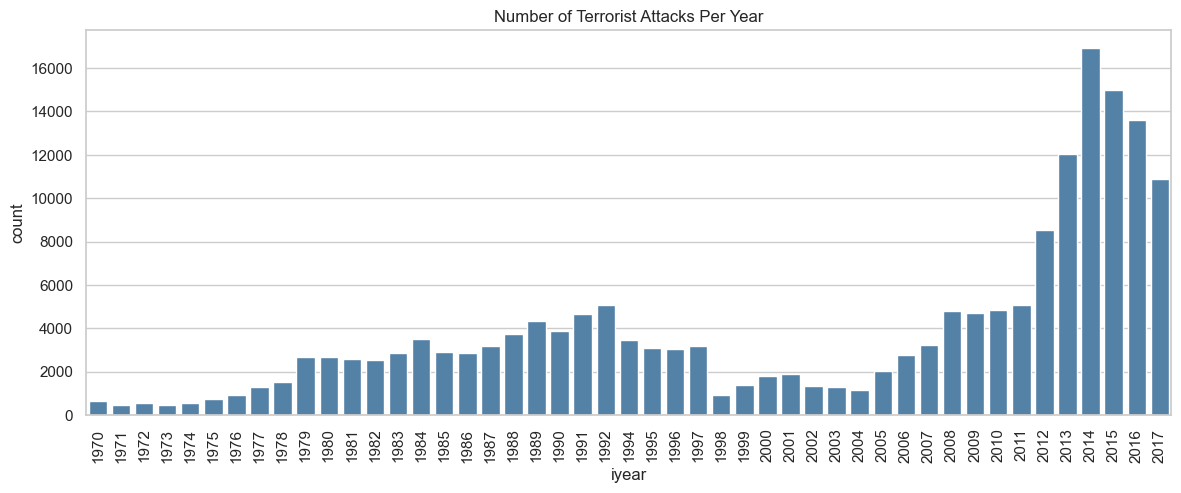

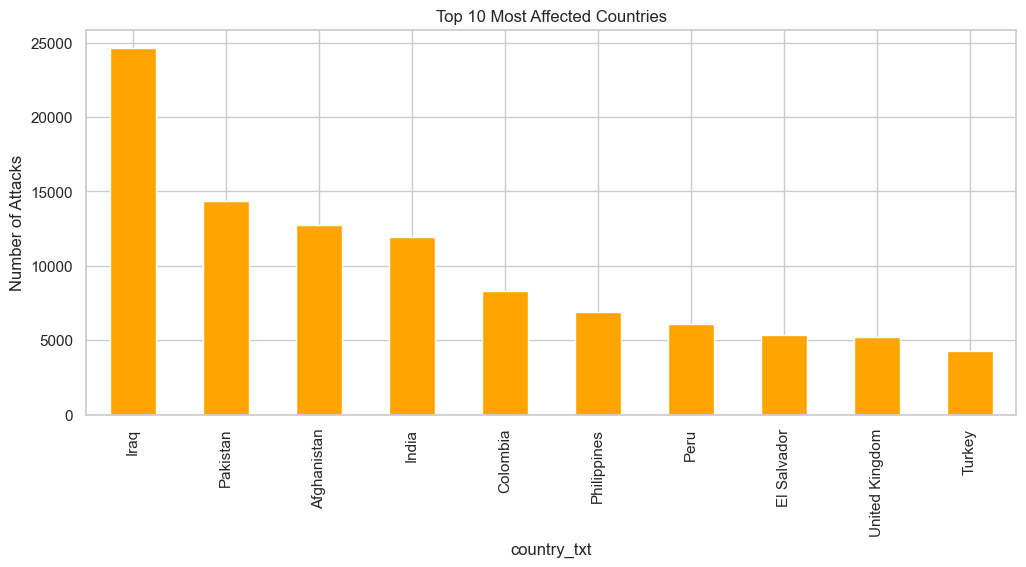

In [13]:
# Yearly Attack Trend
plt.figure(figsize=(14,5))
sns.countplot(data=df, x='iyear', color='steelblue')
plt.title('Number of Terrorist Attacks Per Year')
plt.xticks(rotation=90)
plt.show()

# Top 10 Countries Affected
plt.figure(figsize=(12,5))
df['country_txt'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Most Affected Countries')
plt.ylabel('Number of Attacks')
plt.show()


(3) Bivariate & Multivariate Analysis

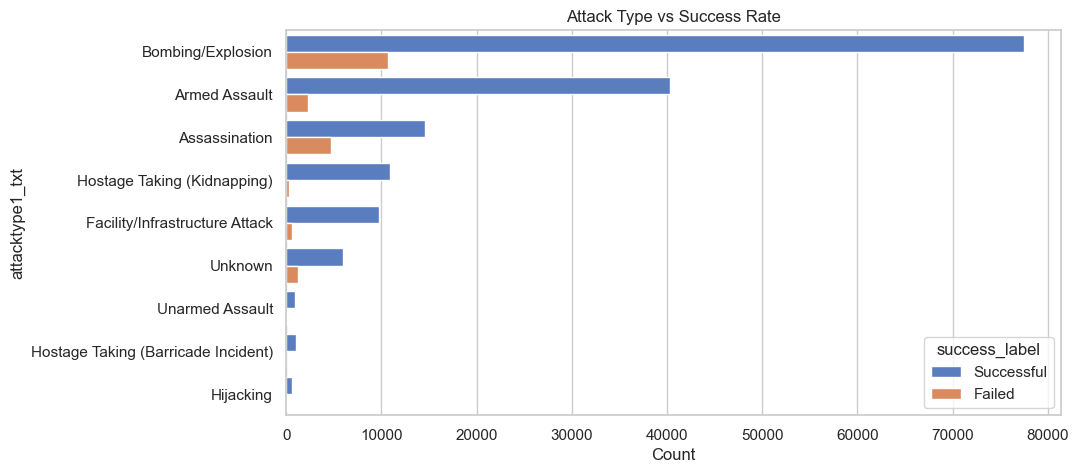

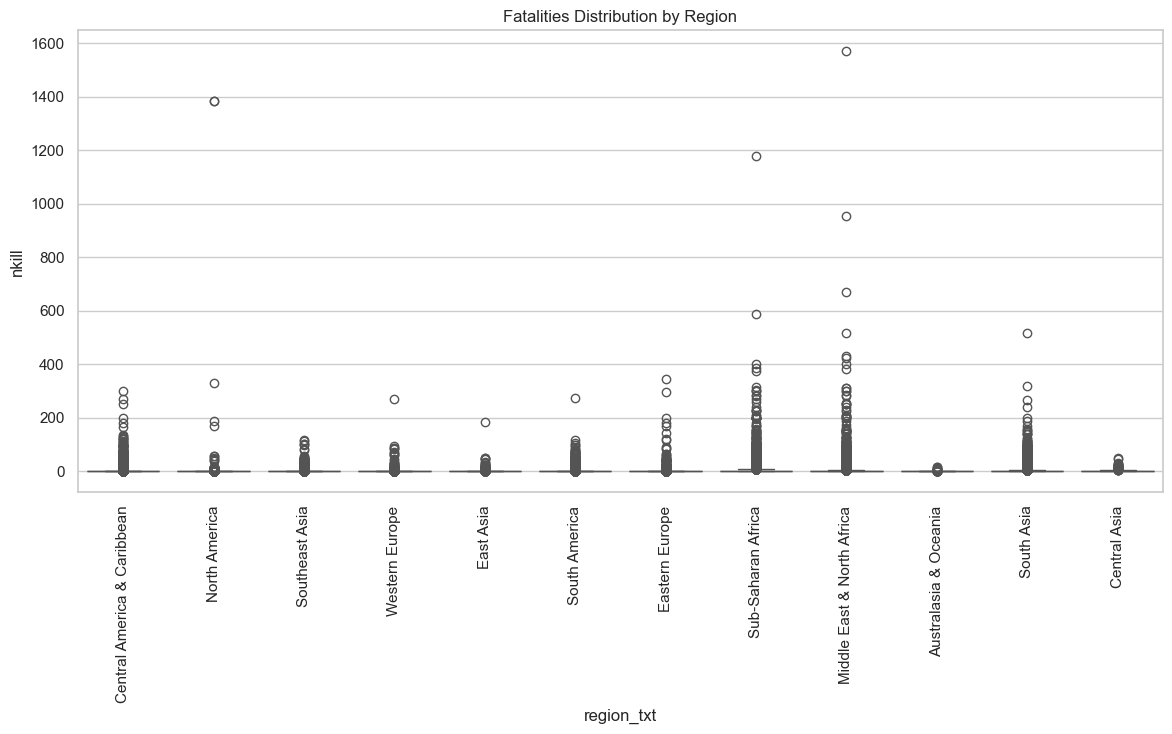

In [14]:
# Attack Types vs Success
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='attacktype1_txt', hue='success_label', order=df['attacktype1_txt'].value_counts().index)
plt.title('Attack Type vs Success Rate')
plt.xlabel('Count')
plt.show()

# Region vs Fatality
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='region_txt', y='nkill')
plt.xticks(rotation=90)
plt.title('Fatalities Distribution by Region')
plt.show()


(4) Correlation Heatmap

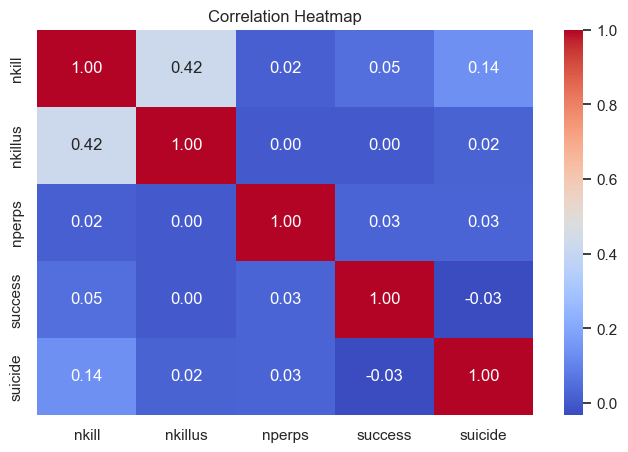

In [15]:
corr_cols = ['nkill', 'nkillus', 'nperps', 'success', 'suicide']
plt.figure(figsize=(8,5))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


(5) Geographic Visualization (Optional - for deeper insight)

In [17]:
import folium
from folium.plugins import HeatMap

# Create base world map
world_map = folium.Map(location=[20, 0], zoom_start=2, tiles='CartoDB positron')

# Add heatmap based on latitude & longitude
heat_data = [[row['latitude'], row['longitude']] for index, row in df.iterrows() if not np.isnan(row['latitude'])]
HeatMap(heat_data, radius=6).add_to(world_map)

world_map.save('global_terrorism_heatmap.html')


Mainly we need to now look out for Filtering cases in  Nigeria..!!!

Now Global Terrorism Database (GTD) for Nigeria 
We will create focused plots that will give powerful insights into terrorism trends, attack types, and regions within Nigeria.

In [21]:
# Filter only incidents that occurred in Nigeria
nigeria_df = df[df['country_txt'] == 'Nigeria']

print("Total incidents in Nigeria:", nigeria_df.shape[0])
display(nigeria_df.head())


Total incidents in Nigeria: 3907


,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,corp1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,date,fatality_level,success_label
3594,1976,2,13,NaN,0,NaN,147,Nigeria,11,Sub-Saharan Africa,Lagos,6.452331,3.419044,1.0,0,The incident occurred at the Alagbon junction ...,02/13/1976: Assailants attacked General Murtal...,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,2,Government (General),17.0,Government of Nigeria,147.0,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coup plotters,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,-99.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Firearms,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Multiple AK-47 assault rifles were used in the...,3.0,0.0,0.0,1.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"The victims included Sergeant Adamu Michika, S...","Segun Akande, ""42 years ago, one of Nigeria's ...","""Anniversary: Motoring Error that Led to the K...",NaN,UMD Miscellaneous,-9,-9,0,-9,NaN,1976-02-13,Low,Successful
10026,1980,1,17,NaN,0,NaN,147,Nigeria,11,Sub-Saharan Africa,Kaduna,10.530204,7.437338,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,9,Unknown,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,NaN,216.0,Great Britain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zimbabwe Patriotic Front,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1,4.0,Unknown,NaN,NaN,1.0,10.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,1,1,1,1,NaN,1980-01-17,No death,Successful
20222,1983,11,11,NaN,0,NaN,147,Nigeria,11,Sub-Saharan Africa,Not Specified,0.000000,0.000000,5.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,0,0,1,Assassination,NaN,NaN,NaN,NaN,2,Government (General),15.0,Nigeria,147.0,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN,1983-11-11,No death,Failed
20350,1983,11,27,NaN,0,NaN,147,Nigeria,11,Sub-Saharan Africa,Lagos,6.618911,3.305532,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,2,Government (General),18.0,Nigerian Ports Authority,147.0,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gang,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.

Partial Summary reports shows that a Total incidents in Nigeria: 3907 from GTD

Let's take a step forwad to see iccidents per year in Nigera in GTD cases around the world

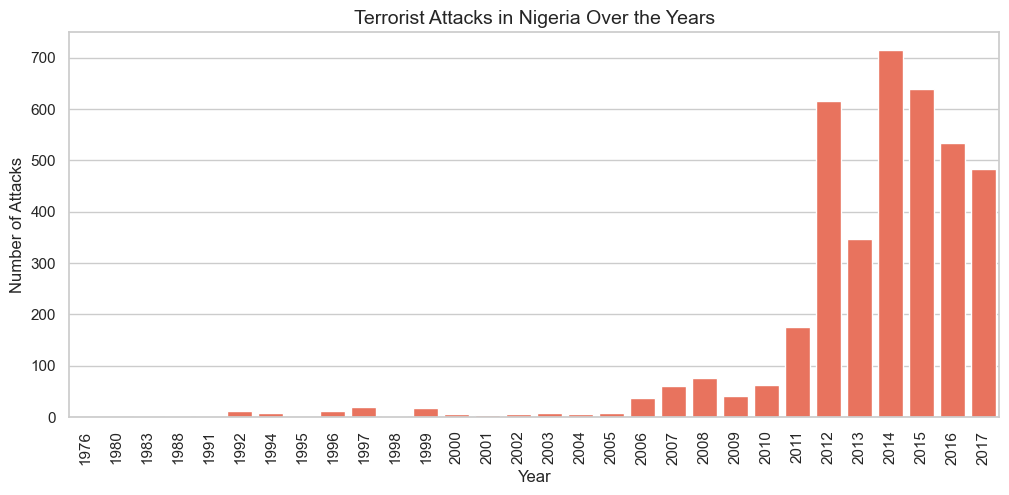

In [22]:
plt.figure(figsize=(12,5))
sns.countplot(data=nigeria_df, x='iyear', color='tomato')
plt.title('Terrorist Attacks in Nigeria Over the Years', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=90)
plt.show()


REPORT : This shows how terrorism evolved in Nigeria over time (for example, the rise of Boko Haram activity after 2009) based on the graph above.

Again Attack Types in Nigeria

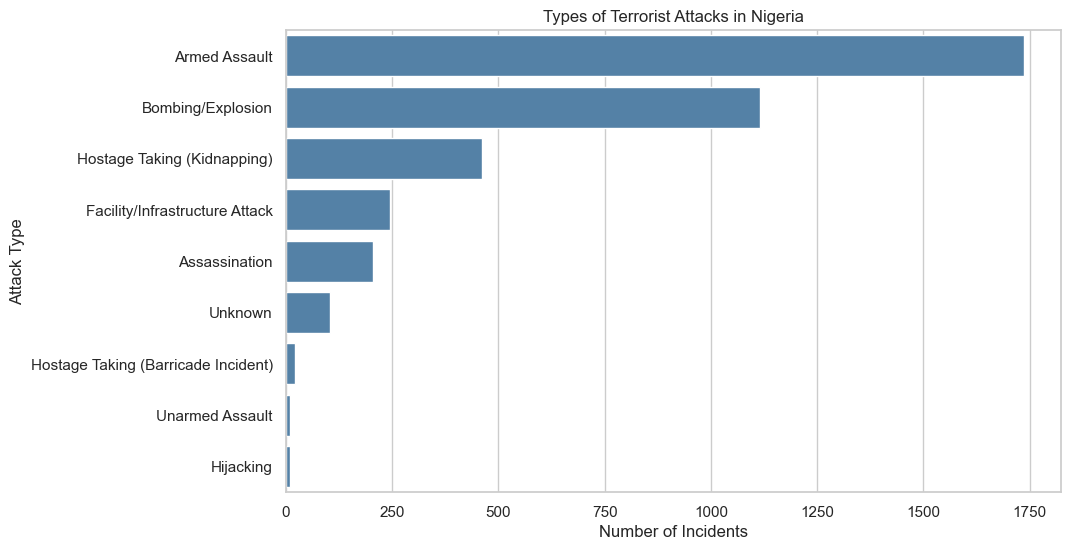

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(data=nigeria_df, y='attacktype1_txt', order=nigeria_df['attacktype1_txt'].value_counts().index, color='steelblue')
plt.title('Types of Terrorist Attacks in Nigeria')
plt.xlabel('Number of Incidents')
plt.ylabel('Attack Type')
plt.show()


Remarks: Its seen Bombing/Explosion and Armed Assault dominating even Hostages taking is of highest order.

While we have not recorded any Hijacking case is within zero level in Nigeria since Global terro began.

Most Targeted Victim Types Nigeria as a peculair case

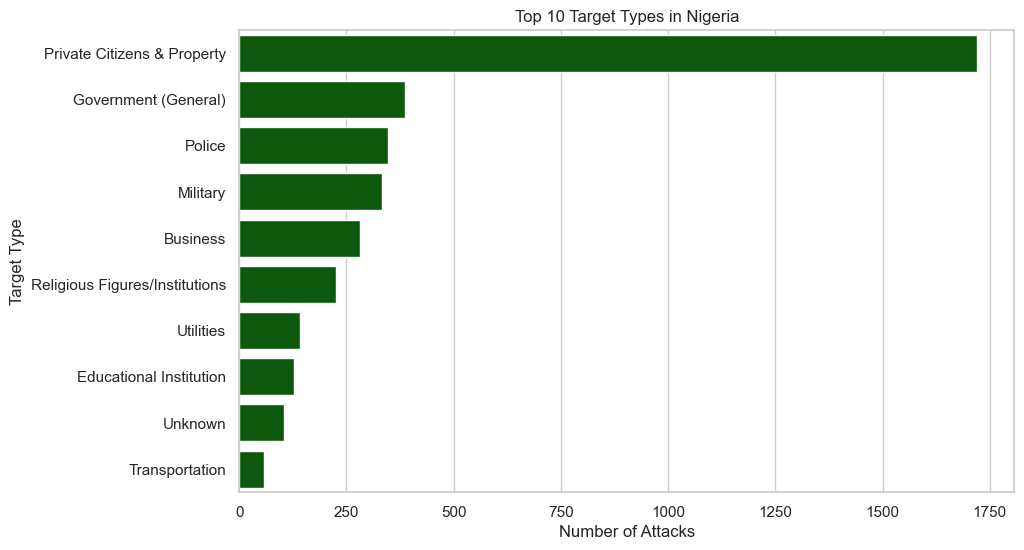

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(data=nigeria_df, y='targtype1_txt', order=nigeria_df['targtype1_txt'].value_counts().index[:10], color='darkgreen')
plt.title('Top 10 Target Types in Nigeria')
plt.xlabel('Number of Attacks')
plt.ylabel('Target Type')
plt.show()


Report: The above also proved that the most affected is private individual(citizens) and property.

Government infrastructures is also affected too

finally, another concerns are our security institutions that are attached. such the police, Military and businesses.

Fatalities Trend Over the Years

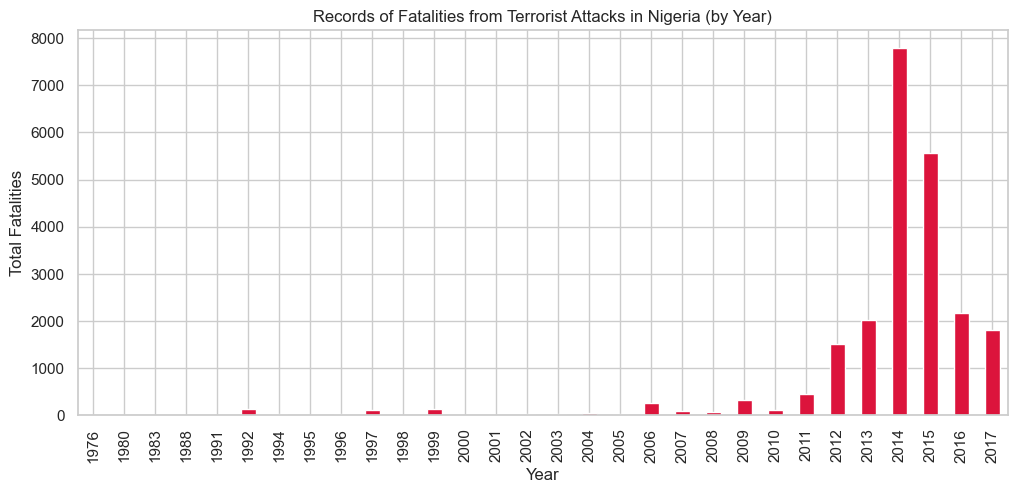

In [26]:
fatality_trend = nigeria_df.groupby('iyear')['nkill'].sum()

plt.figure(figsize=(12,5))
fatality_trend.plot(kind='bar', color='crimson')
plt.title('Records of Fatalities from Terrorist Attacks in Nigeria (by Year)')
plt.xlabel('Year')
plt.ylabel('Total Fatalities')
plt.show()


The above Highlights showed how deadly each year was — useful for assessing counter-terrorism progress.

Regional Distribution of Attacks in Nigeria

In [28]:
print(df.columns.tolist())


['iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'corp1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claimmode2_txt', 'claim3', 'claimmode3', 'claimmode3_txt', 'compclaim', 

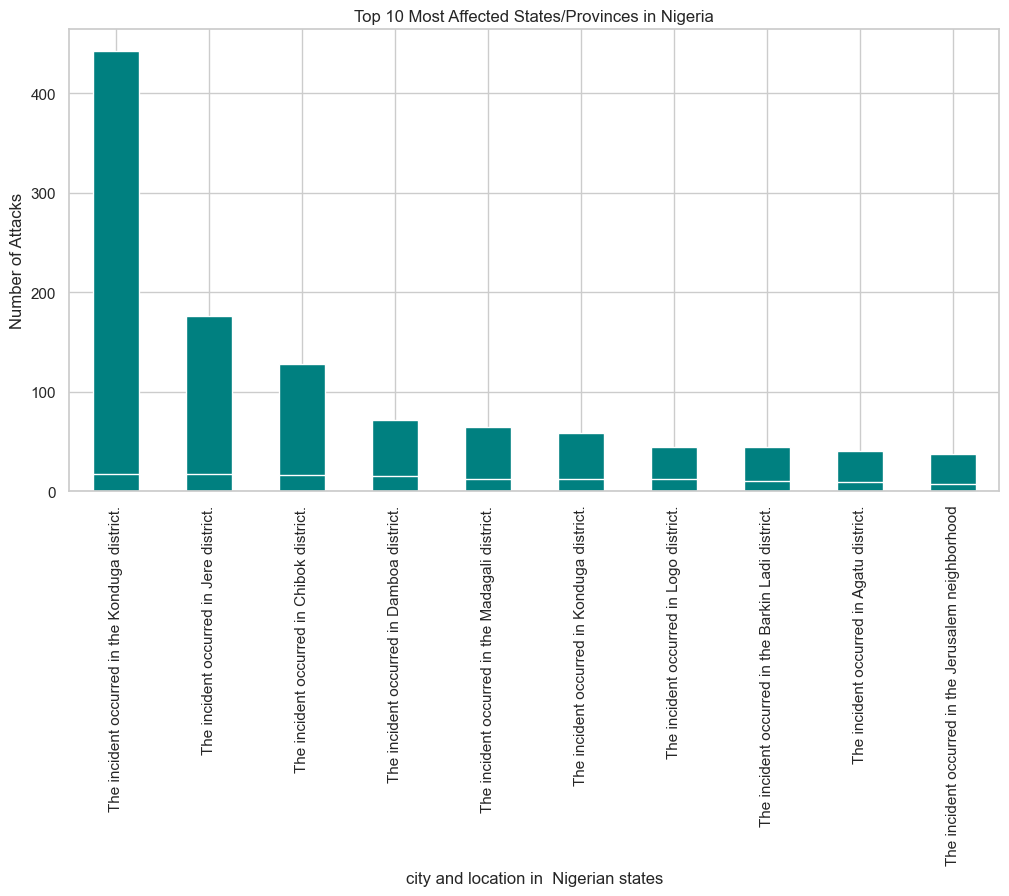

In [31]:
plt.figure(figsize=(12,6))
nigeria_df['city'].value_counts().head(10).plot(kind='bar', color='teal')
nigeria_df['location'].value_counts().head(10).plot(kind='bar', color='teal')
plt.title('Top 10 Most Affected States/Provinces in Nigeria')
plt.xlabel('city and location in  Nigerian states')
plt.ylabel('Number of Attacks')
plt.show()


Nigeria Terror Heatmap

In [34]:
import folium
from folium.plugins import HeatMap

# Center on Nigeria
nigeria_map = folium.Map(location=[9.0820, 8.6753], zoom_start=6, tiles='CartoDB positron')

# Prepare coordinate data
heat_data = nigeria_df[['latitude', 'longitude']].dropna().values.tolist()

# Add heatmap
HeatMap(heat_data, radius=7).add_to(nigeria_map)

nigeria_map.save('nigeria_terrorism_heatmap.html')
print("Interactive Nigeria heatmap saved as nigeria_terrorism_heatmap.html")



Interactive Nigeria heatmap saved as nigeria_terrorism_heatmap.html


In [35]:
# Export coordinates used in the heatmap
heat_df = nigeria_df[['latitude', 'longitude', 'city', 'iyear', 'attacktype1_txt', 'nkill']].dropna()

heat_df.to_csv('nigeria_heatmap_data.csv', index=False)
print(" Heatmap coordinate data saved as 'nigeria_heatmap_data.csv'")


 Heatmap coordinate data saved as 'nigeria_heatmap_data.csv'


Finally Exporting cleaned dataset

In [40]:
df.to_csv("cleaned_global_terrorism.csv", index=False)
print("<><>><><>  Cleaned dataset successfully saved!")


<><>><><>  Cleaned dataset successfully saved!
